# Walmart Holiday Sale Prediction
Given data about weekly Walmart sales, trying to predict whether 
a given record will be from duringa holiday.
We are using logistic Regression, Support Vector Machine, and decision
tree classifier to make our prediction

# Importing the Usual libraries

In [22]:
#import numpy 
import numpy as np
#importing pandas 
import pandas as pd
#importing seaborn for data visualization
import  seaborn as sns
from sklearn.preprocessing import StandardScaler
#importing train_test_split to split the data between train and test set
from sklearn.model_selection import train_test_split
#importing Logistic Regression Model 
from sklearn.linear_model import LogisticRegression
#importing support vector machine classifier
from sklearn.svm import SVC
#importing decision tree model which is tree based model 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Loading the Dataset

In [8]:
df=pd.read_csv('/kaggle/input/walmart-dataset-retail/Walmart_Store_sales.csv')
#showing the dataset
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# Checking the Preliminary Information about the Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Feature Engineering
# Extracting month and year from the data column

In [11]:
df['Month']=df['Date'].apply(lambda x:x[3:5])

In [15]:
df['Year']=df['Date'].apply(lambda x:x[6:])

# Dropping the Original Date Column

In [17]:
df=df.drop('Date',axis=1)

# Visualization the Correlation between the columns

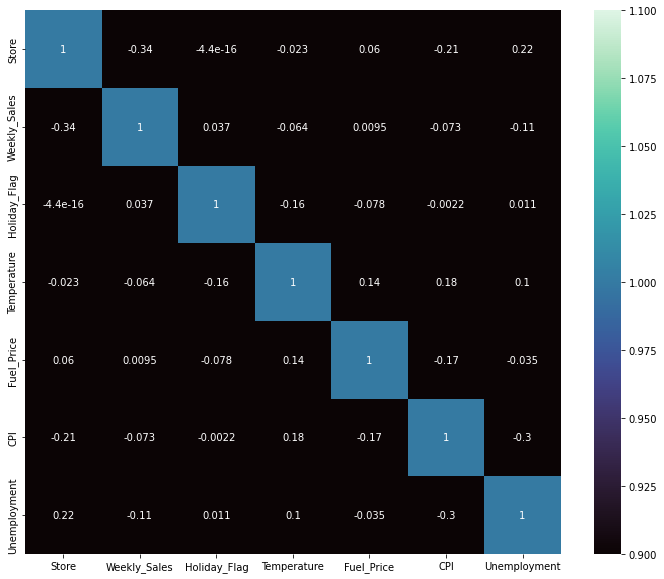

In [23]:
corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,vmin=1.0,cmap='mako')
plt.show()

In [16]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,02,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,02,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,02,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,02,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,03,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,09,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,10,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,10,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,10,2012


# Encoding Store Column

In [24]:
def onehot_encode(df,column):
    dummies=pd.get_dummies(df[column])
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [25]:
df=onehot_encode(df,'Store')

In [26]:
df

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,1,2,...,36,37,38,39,40,41,42,43,44,45
0,1643690.90,0,42.31,2.572,211.096358,8.106,02,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,02,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,02,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,02,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,03,2010,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,713173.95,0,64.88,3.997,192.013558,8.684,09,2012,0,0,...,0,0,0,0,0,0,0,0,0,1
6431,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,0,0,...,0,0,0,0,0,0,0,0,0,1
6432,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,0,0,...,0,0,0,0,0,0,0,0,0,1
6433,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,0,0,...,0,0,0,0,0,0,0,0,0,1


# Splitting and Scaling the Dataset

In [28]:
y=df['Holiday_Flag']
x=df.drop('Holiday_Flag',axis=1)

# Scaling the Dataset

In [29]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# Spitting the DataSet into train and test dataset

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

# Checking the train and test set

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4504, 52)
(1931, 52)
(4504,)
(1931,)


# Creating and  Training the Model

In [33]:
log_model=LogisticRegression()
svm_model=SVC()
dec_model=DecisionTreeClassifier()

# Fitting the train set into the model

In [34]:
log_model.fit(x_train,y_train)
svm_model.fit(x_train,y_train)
dec_model.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier()

# Checking the Score for Each Trained Model

In [36]:
print('Logistic Regression Model',log_model.score(x_test,y_test))
print('Support Vector Machine',svm_model.score(x_test,y_test))
print('Decision Tree Model',dec_model.score(x_test,y_test))

Logistic Regression Model 0.9202485758674263
Support Vector Machine 0.9202485758674263
Decision Tree Model 0.9508026929052305


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [30]:
x

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,1,2,3,...,36,37,38,39,40,41,42,43,44,45
0,1.057420,-0.995136,-1.713800,1.004175,0.056964,-1.373525,-1.210899,6.633250,-0.150756,-0.150756,...,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756
1,1.054348,-1.201170,-1.766089,1.007880,0.056964,-1.373525,-1.210899,6.633250,-0.150756,-0.150756,...,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756
2,1.001206,-1.124178,-1.840166,1.009074,0.056964,-1.373525,-1.210899,6.633250,-0.150756,-0.150756,...,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756
3,0.642828,-0.760907,-1.737766,1.009849,0.056964,-1.373525,-1.210899,6.633250,-0.150756,-0.150756,...,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756
4,0.899914,-0.767955,-1.598328,1.010624,0.056964,-1.064698,-1.210899,6.633250,-0.150756,-0.150756,...,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,-0.591489,0.228602,1.390883,0.519270,0.365109,0.788265,1.298645,-0.150756,-0.150756,-0.150756,...,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,6.633250
6431,-0.555551,0.229144,1.364738,0.523256,0.356046,1.097092,1.298645,-0.150756,-0.150756,-0.150756,...,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,6.633250
6432,-0.553762,-0.335825,1.397419,0.527241,0.356046,1.097092,1.298645,-0.150756,-0.150756,-0.150756,...,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,6.633250
6433,-0.582715,-0.227385,1.329879,0.527332,0.356046,1.097092,1.298645,-0.150756,-0.150756,-0.150756,...,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,-0.150756,6.633250
